<h1> Spatial Filtering with Pillow</h1>


# Objectives
- Linear Filtering
    - Filtering Noise
    - Gaussian Blur
    - Image Sharpening
- Edges
- Median


In [1]:
# download images
!wget https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-CV0101EN-SkillsNetwork/images%20/images_part_1/cameraman.jpeg
!wget https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-CV0101EN-SkillsNetwork/images%20/images_part_1/lenna.png
!wget https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-CV0101EN-SkillsNetwork/images%20/images_part_1/barbara.png   

--2024-02-03 23:08:47--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-CV0101EN-SkillsNetwork/images%20/images_part_1/cameraman.jpeg
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.45.118.108
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.45.118.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 7243 (7.1K) [image/jpeg]
Saving to: ‘cameraman.jpeg.1’

cameraman.jpeg.1    100%[===================>]   7.07K  --.-KB/s    in 0s      

2024-02-03 23:08:50 (863 MB/s) - ‘cameraman.jpeg.1’ saved [7243/7243]

--2024-02-03 23:08:50--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-CV0101EN-SkillsNetwork/images%20/images_part_1/lenna.png
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.clo

In [2]:
# import libraries
# Used to view the images
import matplotlib.pyplot as plt
# Used to load an image
from PIL import Image
# Used to create kernels for filtering
import numpy as np

In [3]:
# helper function to plot images side-by-side
def plot_image(image_1, image_2,title_1="Orignal",title_2="New Image"):
    plt.figure(figsize=(10,10))
    plt.subplot(1, 2, 1)
    plt.imshow(image_1)
    plt.title(title_1)
    plt.subplot(1, 2, 2)
    plt.imshow(image_2)
    plt.title(title_2)
    plt.show()

## Linear Filtering

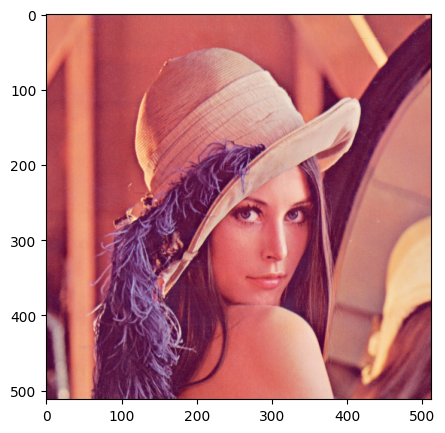

In [4]:
# load the image
image = Image.open('lenna.png')
# render the image
plt.figure(figsize=(5,5))
plt.imshow(image)
plt.show()

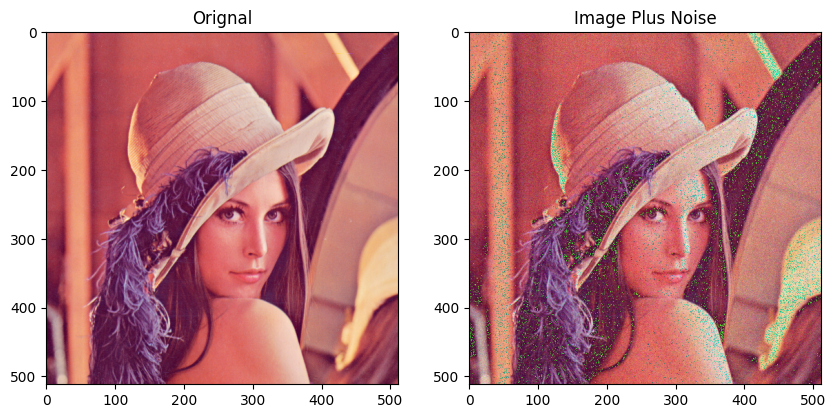

In [6]:
# get the number of rows and columns in the image
rows, cols = image.size
# create values using a normal distribution with a mean of 0 and standard diviation of 15 
# values are converted to uint8, which means they are between values of 0 and 255
noise = np.random.normal(0,15,(rows, cols, 3)).astype(np.uint8)
# add noise to the image
new_image = image + noise
# create a PIL image from an array
new_image = Image.fromarray(new_image)
# Plots the original image and the image with noise using the function defined at the top
plot_image(image, new_image, title_1="Orignal", title_2="Image Plus Noise")


## Filtering noise

In [7]:
from PIL import ImageFilter

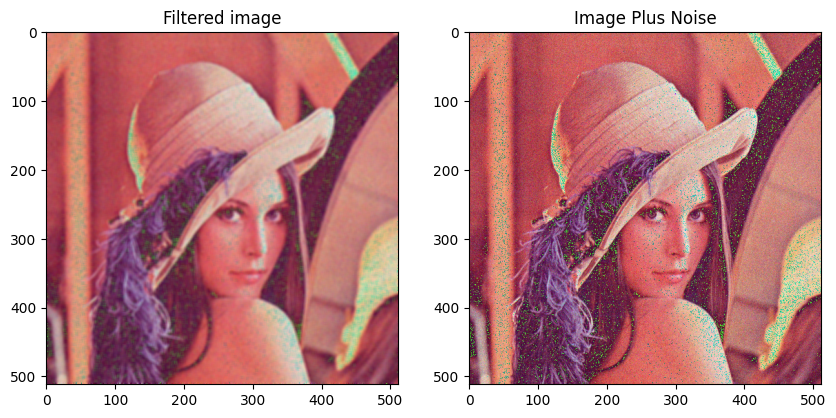

In [9]:
# Create a kernel which is a 5 by 5 array where each value is 1/36
kernel = np.ones((5,5))/36
# create an image filter kernel by providing the kernel size and the flattened kernel
kernel_filter = ImageFilter.Kernel((5,5), kernel.flatten())
# filter the images using kernel
image_filtered = new_image.filter(kernel_filter)
# Plots the Filtered and Image with Noise using the function defined at the top
plot_image(image_filtered, new_image,title_1="Filtered image",title_2="Image Plus Noise")

A smaller kernel keeps the image sharp, but filters less noise, here we try a 3x3 kernel. You can see her shoulders are sharper in this image but the green noise is brighter than the filtered image above.


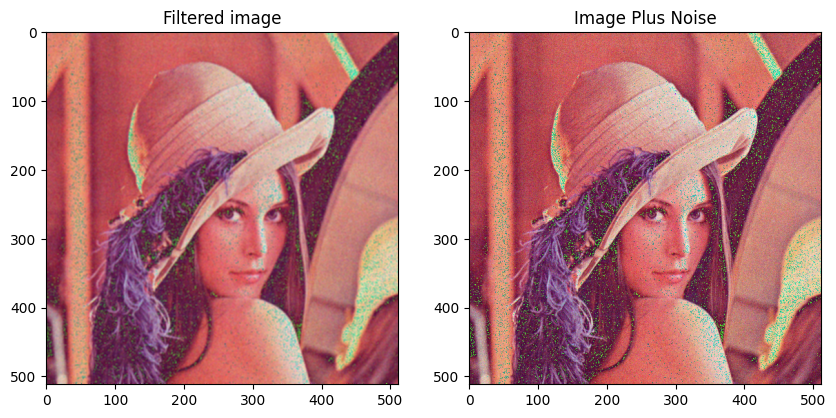

In [13]:
# Create a kernel which is a 3 by 3 array where each value is 1/36
kernel = np.ones((3,3))/36
# Create a ImageFilter Kernel by providing the kernel size and a flattened kernel
kernel_filter = ImageFilter.Kernel((3,3), kernel.flatten())
# Filters the images using the kernel
image_filtered = new_image.filter(kernel_filter)
# Plots the Filtered and Image with Noise using the function defined at the top
plot_image(image_filtered, new_image,title_1="Filtered image",title_2="Image Plus Noise")

## Gausian Blur

To perform Gaussian Blur we use the filter function on an image using the predefined filter ImageFilter.GaussianBlur


Parameters

radius: blur kernel radius, default 2

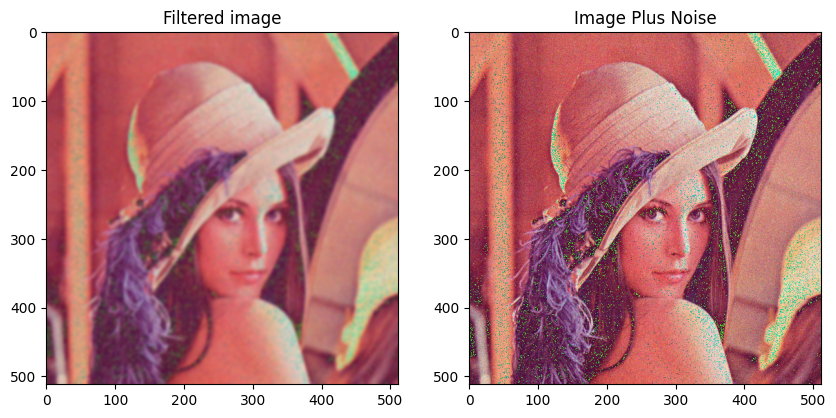

In [14]:
# Filters the images using GaussianBlur
image_filtered = new_image.filter(ImageFilter.GaussianBlur)
# Plots the Filtered Image then the Unfiltered Image with Noise
plot_image(image_filtered , new_image,title_1="Filtered image",title_2="Image Plus Noise")

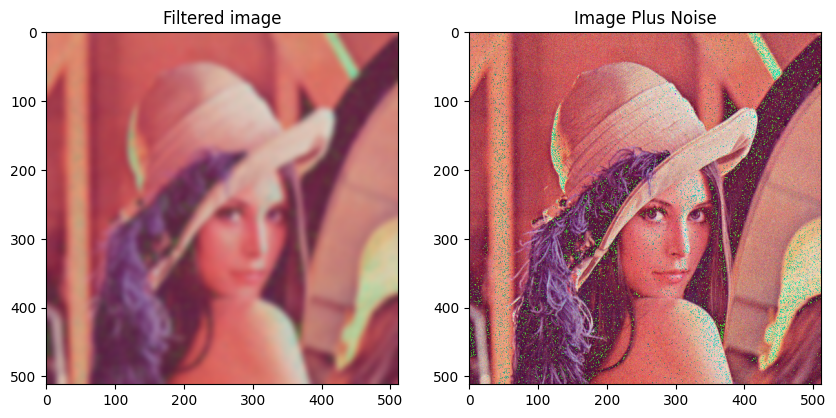

In [15]:
# Filters the images using GaussianBlur on the image with noise using a 4 by 4 kernel 
image_filtered = new_image.filter(ImageFilter.GaussianBlur(4))
# Plots the Filtered Image then the Unfiltered Image with Noise
plot_image(image_filtered , new_image,title_1="Filtered image",title_2="Image Plus Noise")

## Image Sharpening

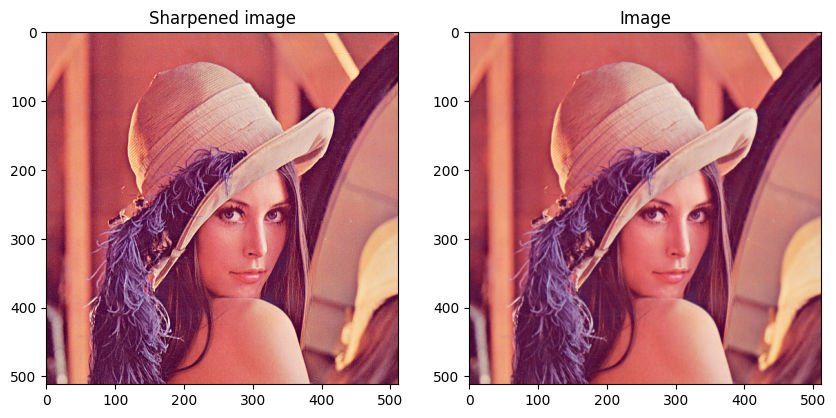

In [16]:
# Sharpends image using predefined image filter from PIL
sharpened = image.filter(ImageFilter.SHARPEN)
# Plots the sharpened image and the original image without noise
plot_image(sharpened , image, title_1="Sharpened image",title_2="Image")

## Edges

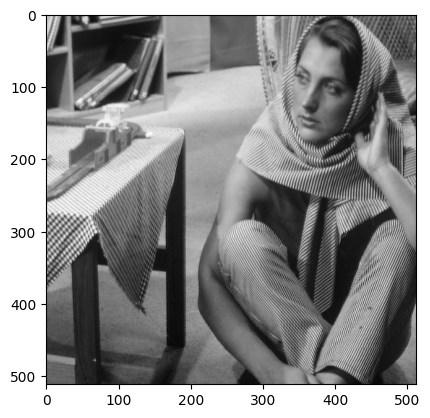

In [17]:
# Loads the image from the specified file
img_gray = Image.open('barbara.png')
# Renders the image from the array of data, notice how it is 2 diemensional instead of 3 diemensional because it has no color
plt.imshow(img_gray ,cmap='gray')

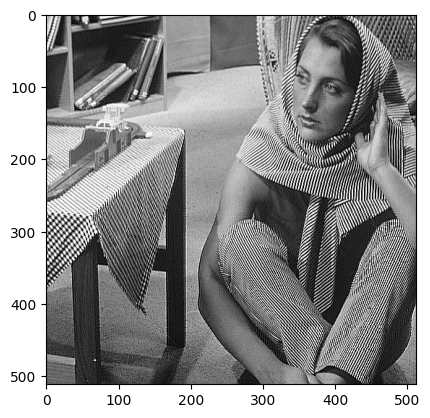

In [18]:
# Filters the images using EDGE_ENHANCE filter
img_gray = img_gray.filter(ImageFilter.EDGE_ENHANCE)
# Renders the enhanced image
plt.imshow(img_gray ,cmap='gray')

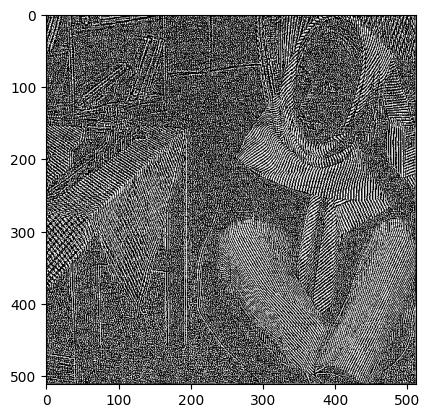

In [20]:
# Filters the images using FIND_EDGES filter
img_gray = img_gray.filter(ImageFilter.FIND_EDGES)
# Renders the filtered image
plt.imshow(img_gray ,cmap='gray')

## Median

Median filters find the median of all the pixels under the kernel area and the central element is replaced with this median value. 


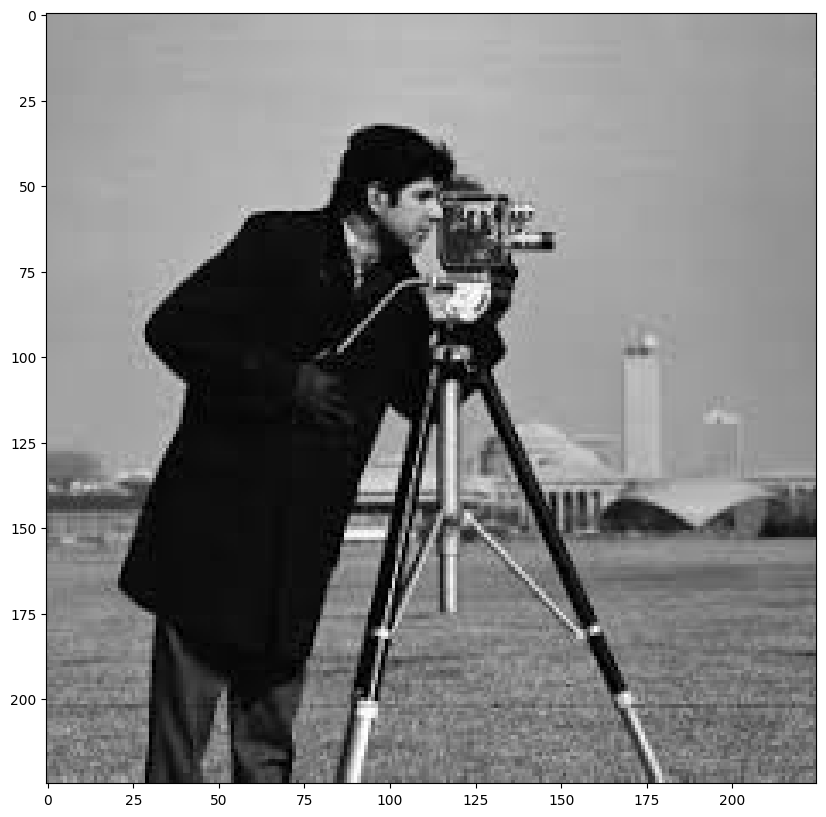

In [21]:
# Load the camera man image
image = Image.open("cameraman.jpeg")
# Make the image larger when it renders
plt.figure(figsize=(10,10))
# Renders the image
plt.imshow(image,cmap="gray")

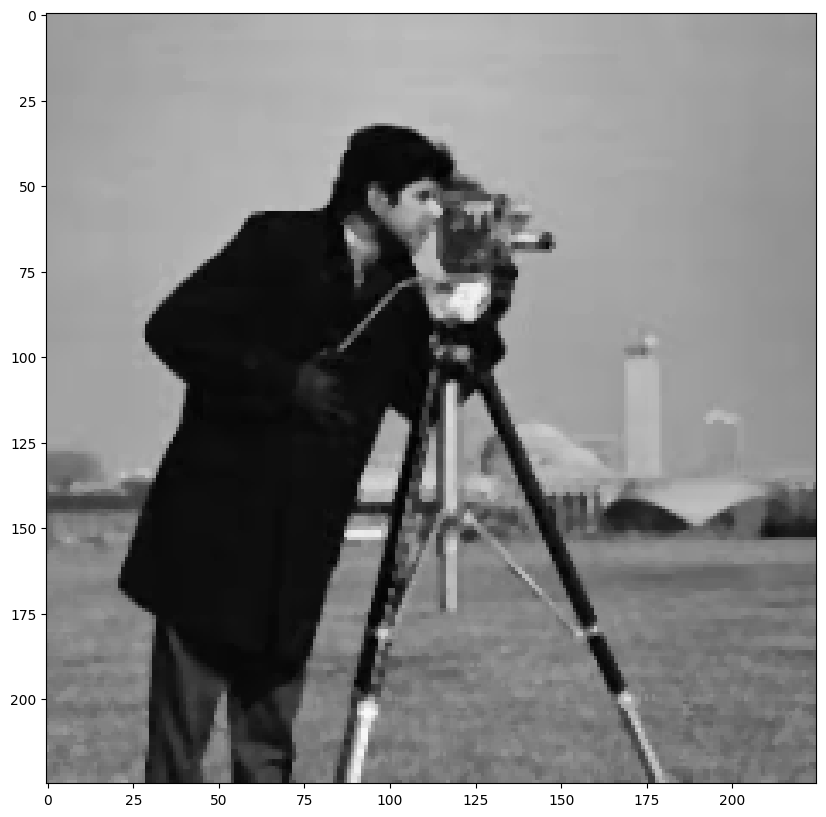

In [22]:
image = image.filter(ImageFilter.MedianFilter)
plt.figure(figsize=(10,10))
# Renders the image
plt.imshow(image,cmap="gray")